# __MACHINE LEARNING PROJECT EXAM__
### PRISCILA DENISE MUWANGUZI (M23B23/010,B20237)

### __QN 1__
### FISH DISEASE CLASSIFICATION

In [9]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Set random seed for reproducibility
np.random.seed(42)

In [10]:
# Load data
train_df = pd.read_csv('fish_disease_train.csv')
test_df = pd.read_csv('fish_disease_test.csv')

EXPLORING THE TRAIN DATASET. 

In [11]:
train_df.head()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
0,3.089044,103.484474,0.715319,0.751992,0.988201,3.525075,133.927888,134.124637,122.583450,36.333672,66.270070,4391.722207,3.987488,1.570458,9
1,0.173448,8.590868,0.988954,0.992453,0.976619,0.097429,189.096533,127.788239,71.194086,1.148008,13.838293,191.498341,166.917837,12.609277,3
2,0.444434,8.979343,0.963752,0.975923,0.951181,0.227418,42.653656,38.407018,39.996562,1.112086,9.721199,94.501712,143.855685,11.278587,1
3,0.308950,9.696244,0.977235,0.982782,0.976515,0.248347,72.558788,89.174254,93.234549,1.565753,14.237728,202.712904,125.096421,10.528541,0
4,0.892447,12.352270,0.926267,0.943913,0.989706,0.487507,89.285731,84.507989,77.357355,5.893133,24.603154,605.315202,24.686244,4.585030,0


In [12]:
train_df.shape

(7967, 15)

In [13]:
train_df.isnull().sum()

Entropy          0
Contrast         0
Energy           0
Homogeneity      0
Correlation      0
Dissimilarity    0
Average_R        0
Average_G        0
Average_B        0
Mean             0
Std Dev          0
Variance         0
Kurtosis         0
Skewness         0
Class            0
dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entropy        7967 non-null   float64
 1   Contrast       7967 non-null   float64
 2   Energy         7967 non-null   float64
 3   Homogeneity    7967 non-null   float64
 4   Correlation    7967 non-null   float64
 5   Dissimilarity  7967 non-null   float64
 6   Average_R      7967 non-null   float64
 7   Average_G      7967 non-null   float64
 8   Average_B      7967 non-null   float64
 9   Mean           7967 non-null   float64
 10  Std Dev        7967 non-null   float64
 11  Variance       7967 non-null   float64
 12  Kurtosis       7967 non-null   float64
 13  Skewness       7967 non-null   float64
 14  Class          7967 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 933.8 KB


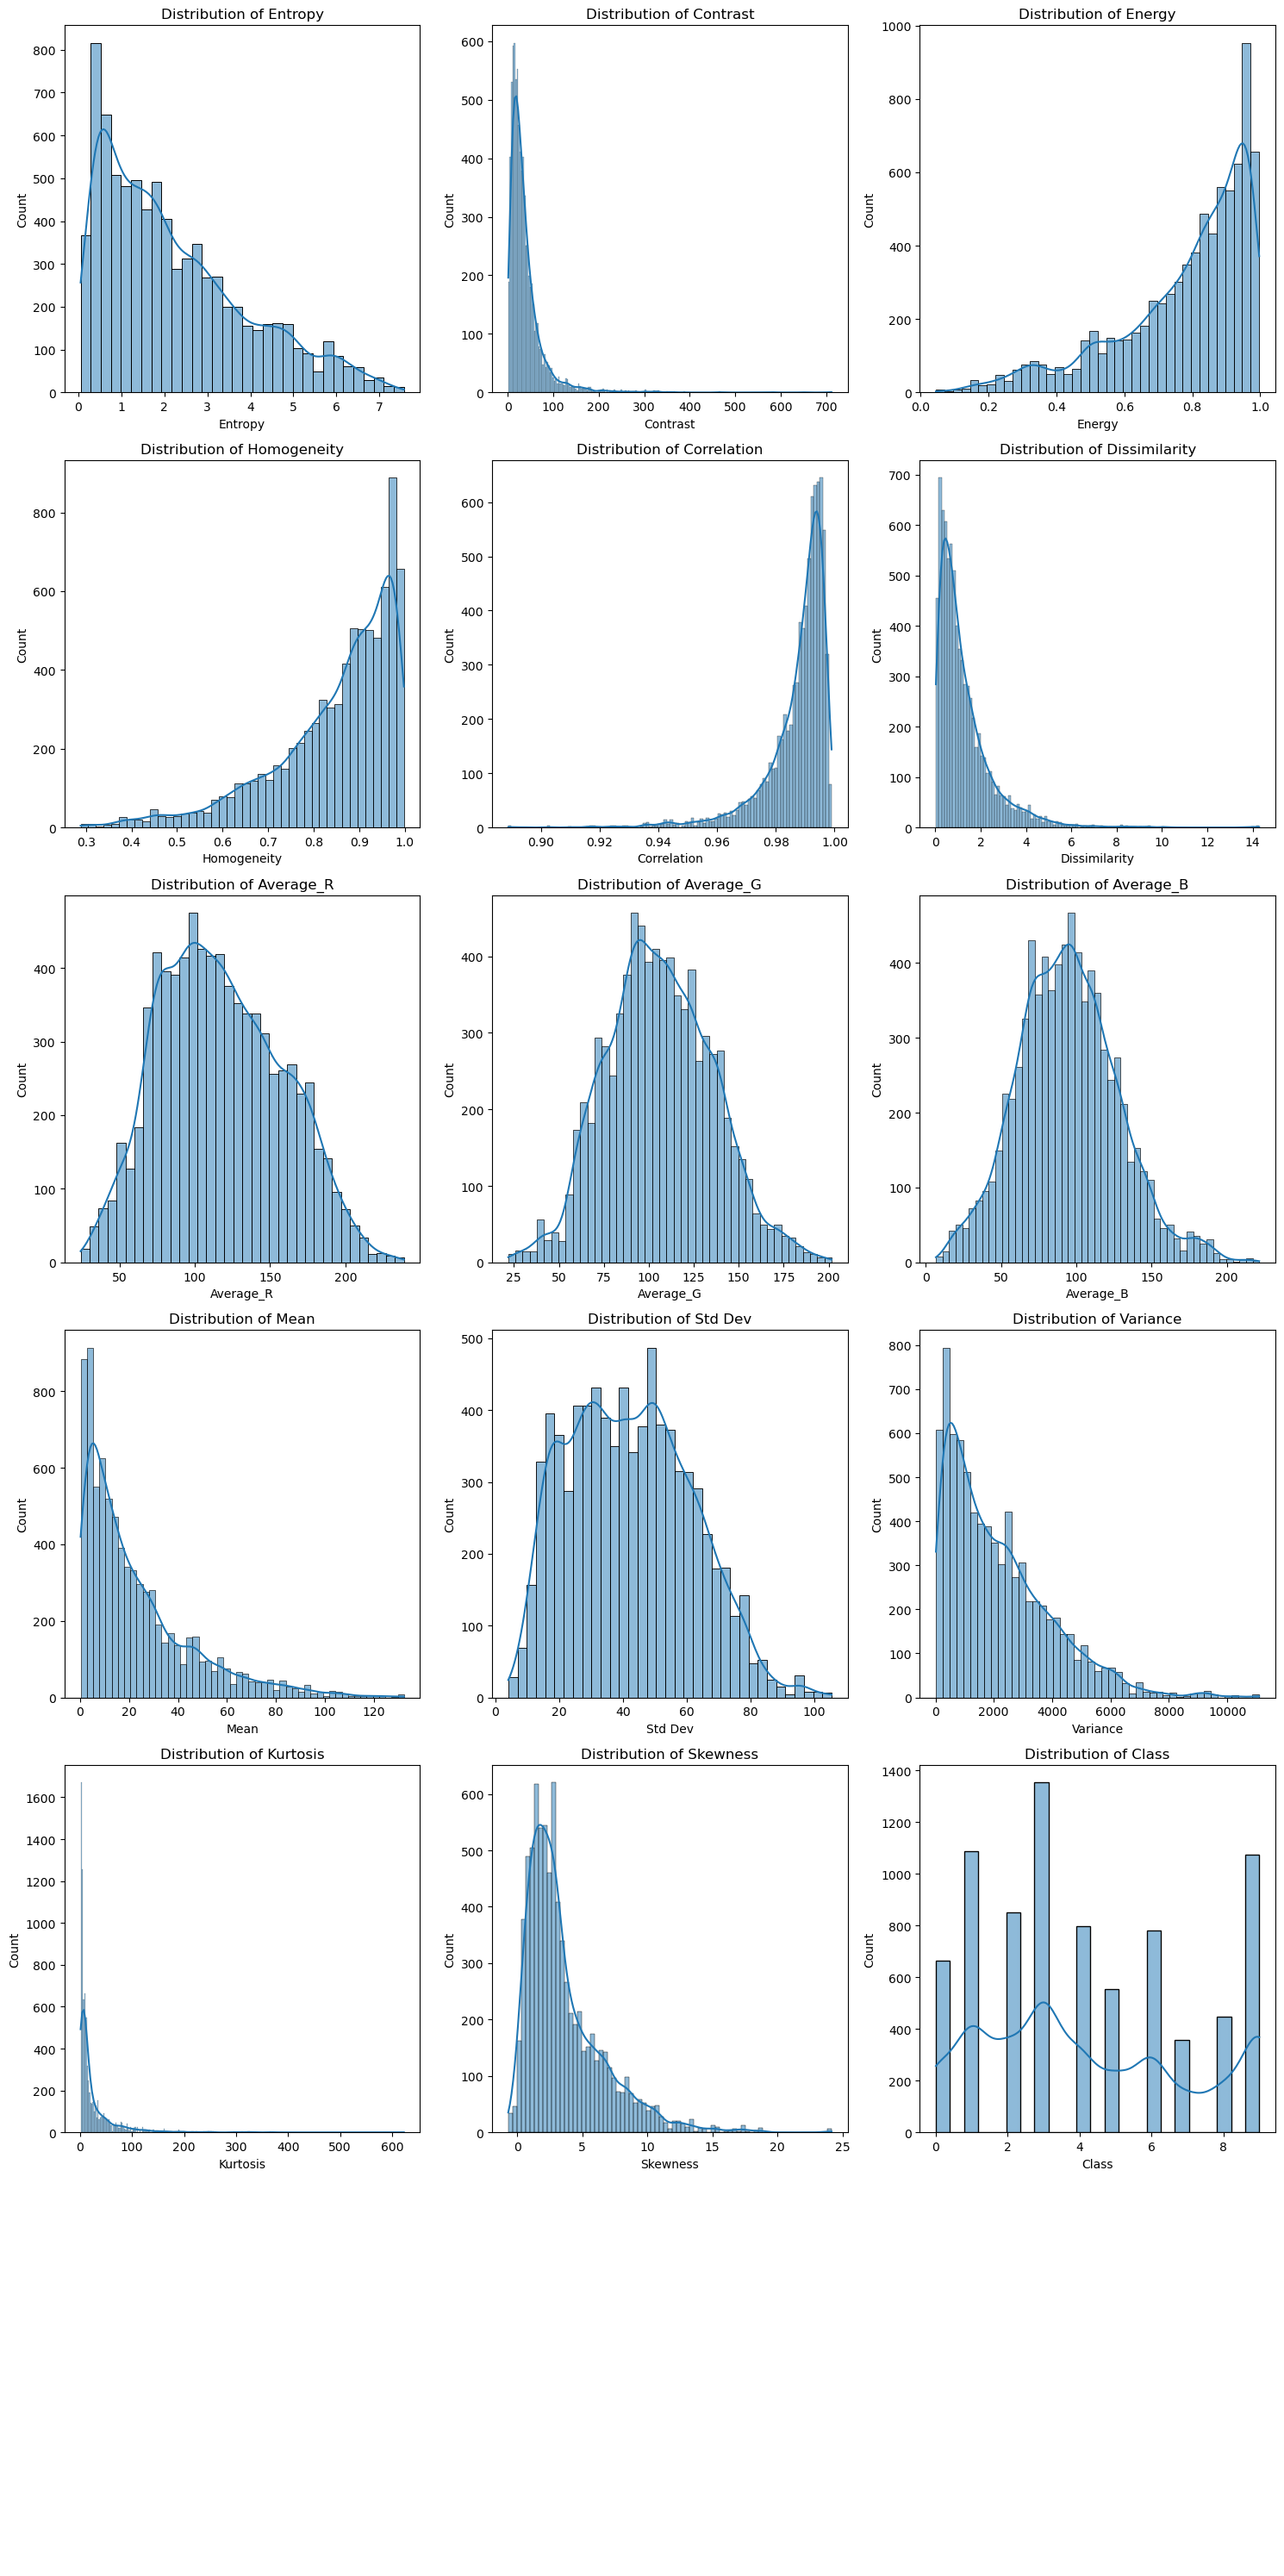

In [27]:
# Visualize feature distributions (histograms)
num_features = train_df.shape[1]
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(train_df.columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('feature_histograms.png') 
plt.show()

In [17]:
train_df.describe()

,Entropy,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,Average_R,Average_G,Average_B,Mean,Std Dev,Variance,Kurtosis,Skewness,Class
count,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000,7967.000000
mean,2.222886,38.931241,0.776910,0.846132,0.987186,1.280451,117.165562,106.037464,94.289301,23.034242,42.173318,2142.859132,25.306812,3.598604,4.173717
std,1.677508,44.713150,0.195839,0.134906,0.011334,1.296208,40.540463,29.675955,33.420915,22.536869,19.087067,1774.704907,44.203438,3.035590,2.874904
min,0.049853,1.235598,0.045283,0.288351,0.888934,0.028019,24.288282,21.860880,6.642548,0.183133,4.046896,16.377366,1.238923,-0.690582,0.000000
25%,0.839781,15.179110,0.679264,0.780700,0.983980,0.434886,85.753624,85.548695,71.153248,6.009246,26.871280,722.065676,4.044270,1.488253,2.000000
50%,1.796992,27.233222,0.837295,0.886173,0.990785,0.885058,113.608087,104.746727,93.061861,15.690372,41.293857,1705.182647,9.757016,2.723007,4.000000
75%,3.210627,46.455698,0.932488,0.951546,0.994244,1.662885,146.814227,126.255530,115.029308,31.567633,55.841307,3118.251519,27.171862,4.800967,6.000000
max,7.573361,711.544374,0.997095,0.997904,0.998970,14.284569,238.778216,201.653908,221.475372,132.280814,105.325599,11093.481810,622.617208,24.163986,9.000000


In [26]:
train_df.duplicated().sum()

0

In [ ]:
test_df.head()

In [ ]:
# Separate features and target (assuming last column is label)
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [ ]:
# Data exploration
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Class distribution in train:", y_train.value_counts())

# Check for missing values
print("Missing values in train:", train_df.isnull().sum().sum())

# Scale features (important for some models like KNN and PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Disease Class')
plt.ylabel('Count')
plt.show()